In [ ]:
### Replicate Surridge Mean Electorate Plots

# TODO
### add weights
### get some error bars 
### get some splits


In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_Panel|column_description'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
# (var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    





Toggle code

Wall time: 18.2 s


In [2]:
# search(BES_Panel,"wt_new")

In [3]:
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

In [4]:
wave_list = ["W1_W5","W6","W7_W9","W10_W12","W13","W14W15","W16","W17"]
friendly_wave = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Friendlier_Description"]
wts_to_waves = {"wt_full_W1":"W1_W5","wt_full_W2":"W1_W5","wt_full_W3":"W1_W5","wt_full_W4":"W1_W5","wt_full_W4":"W1_W5",
 'wt_full_W5':"W1_W5", 'wt_new_W6':"W6", 'wt_new_W7':"W7_W9", 'wt_new_W8':"W7_W9", 'wt_new_W9':"W7_W9",
 'wt_new_W10':"W10_W12", 'wt_new_W11':"W10_W12", 'wt_new_W12':"W10_W12", 'wt_new_W13_result':"W13",
 'wt_new_W14':"W14W15", 'wt_new_W15':"W14W15", 'wt_new_W16':"W16", 'wt_new_W17':"W17",}

In [5]:
search(BES_Panel,"^wt_new_W14|^wt_full_W14|^wt_(new|full)_W1_")

wt_new_W14        31063
wt_new_W1_W16      2427
wt_new_W1_W11      6473
wt_new_W1_W12      5833
wt_new_W1_W13      5301
wt_new_W1_W14      4191
wt_full_W1_W11     6473
dtype: int64

In [6]:
search(BES_Panel,"al_scale")

# al_scaleW6,al_scaleW13,al_scaleW17

al_scaleW1_W5      37890
al_scaleW6         27288
al_scaleW7_W9      35873
al_scaleW10_W12    30088
al_scaleW13        27253
al_scaleW14W15     31629
al_scaleW16        32671
al_scaleW17        29773
dtype: int64

In [7]:
df = BES_Panel[search(BES_Panel,"al_scale|lr_scale").index].apply(lambda x: x.cat.codes.replace(-1,np.nan))

In [8]:
al_df = BES_Panel[search(BES_Panel,"al_scale").index].apply(lambda x: x.cat.codes.replace(-1,np.nan))
al_df.columns = [x.replace("al_scale","") for x in al_df.columns ]
al_means = al_df.melt().groupby("variable")["value"].mean()


In [9]:
lr_df = BES_Panel[search(BES_Panel,"lr_scale").index].apply(lambda x: x.cat.codes.replace(-1,np.nan))
lr_df.columns = [x.replace("lr_scale","") for x in al_df.columns ]
lr_means = lr_df.melt().groupby("variable")["value"].mean()


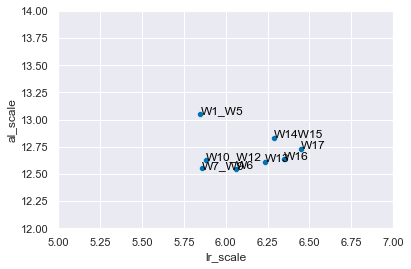

In [10]:
sns.scatterplot(x=lr_means,y=al_means)
for line in range(0,lr_means.shape[0]):
     plt.text(lr_means[line], al_means[line], lr_means.index[line], horizontalalignment='left', size='medium', color='black')#, weight='semibold')
plt.xlabel("lr_scale");
plt.ylabel("al_scale");
plt.xlim(5,7);
plt.ylim(12,14);

In [264]:
##

In [263]:
# # quietly drops row with np.nan weights!    
# def weighted_mean(x, **kws):
#     val, weight = map(np.asarray, zip(*x))
#     mask = (~np.isnan(val))&(~np.isnan(weight))
#     val, weight = val[mask],weight[mask]
#     return (val * weight).sum() / weight.sum()

# def weighted_mean_nonans(x, **kws):
#     val, weight = map(np.asarray, zip(*x))
# #     mask = (~np.isnan(val))&(~np.isnan(weight))
# #     val, weight = val[mask],weight[mask]
#     return (val * weight).sum() / weight.sum()


In [197]:
%%time
example_ser = pd.Series(zip(lr_df["W1_W5"],BES_Panel["wt_full_W1W2W3W4W5"]),index=lr_df["W1_W5"].index)


Wall time: 63 ms


In [193]:
mask = lr_df["W1_W5"].notnull() & BES_Panel["wt_full_W1W2W3W4W5"].notnull()

In [261]:
%%time
mn,reps = bootstrap(example_ser,100)

Wall time: 3.03 s


In [248]:
import numba
from numba import jit

# quietly drops row with np.nan weights!    
# @jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def weighted_mean_orig(x):
    val, weight = map(np.asarray, zip(*x))
    mask = (~np.isnan(val))&(~np.isnan(weight))
    val, weight = val[mask],weight[mask]
    return (val * weight).sum() / weight.sum()

def weighted_mean(x):
    val, weight = map(np.asarray, zip(*x))
    mask = (~np.isnan(val))&(~np.isnan(weight))
    val, weight = val[mask],weight[mask]
    return wt_mean(val,weight)

# @jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def weighted_mean_nonans(x):
    val, weight = map(np.asarray, zip(*x))
#     raise Exception
#     mask = (~np.isnan(val))&(~np.isnan(weight))
#     val, weight = val[mask],weight[mask]
    return wt_mean(val,weight)

def weighted_mean_nonans_orig(x):
    val, weight = map(np.asarray, zip(*x))
#     raise Exception
#     mask = (~np.isnan(val))&(~np.isnan(weight))
#     val, weight = val[mask],weight[mask]
    return (val * weight).sum() / weight.sum()

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def wt_mean(val,weight):
    return (val * weight).sum() / weight.sum()


def _dummy_jit(*args, **kwargs):
    """Dummy wrapper for jitting if numba not applicable."""

    def wrapper(f):
        return f

    def marker(*args, **kwargs):
        return marker

    if (
        len(args) > 0
        and (args[0] is marker or not callable(args[0]))
        or len(kwargs) > 0
    ):
        # @jit(int32(int32, int32)), @jit(signature="void(int32)")
        return wrapper
    elif len(args) == 0:
        # @jit()
        return wrapper
    else:
        # @jit
        return args[0]

def _make_one_arg_numba_func(func, func_args):
    """
    Make a Numba'd version of a function that takes one positional
    argument.
    Parameters
    ----------
    func : function
        Function with call signature `func(x, *args)`.
    func_args : tuple
        Tuple of args to use in testing a function call.
    Returns
    -------
    output : Numba'd function (or original function)
        A Numba'd version of the function. If that is not possible,
        returns the original function.
    numba_success : bool
        True if function was successfully jitted.
    """
    try:
        func_numba = numba.jit(func, nopython=True)

        @numba.jit(nopython=True)
        def f(x, args=()):
            return func_numba(x, *args)

        # Attempt function call
        _ = f(np.array([1., 2.]), func_args)

        return f, True
    except:
        def f(x, args=()):
            return func(x, *args)

        return f, False

def draw_bs_reps(data, func, size=1, args=()):
    """
    Generate bootstrap replicates out of `data` using `func`.
    Parameters
    ----------
    data : array_like
        One-dimensional array of data.
    func : function
        Function, with call signature `func(data, *args)` to compute
        replicate statistic from resampled `data`.
    size : int, default 1
        Number of bootstrap replicates to generate.
    args : tuple, default ()
        Arguments to be passed to `func`.
    Returns
    -------
    output : ndarray
        Bootstrap replicates computed from `data` using `func`.
    Notes
    -----
    .. nan values are ignored.
    """
#     data = _convert_data(data)

    if args == ():
        if func == np.mean:
            return _draw_bs_reps_mean(data, size=size)
        elif func == np.median:
            return _draw_bs_reps_median(data, size=size)
        elif func == np.std:
            return _draw_bs_reps_std(data, size=size)

    # Make Numba'd function
    f, numba_success = _make_one_arg_numba_func(func, args)

    if numba_success:
        jit = numba.jit
    else:
        jit = _dummy_jit

    @jit(nopython=True)
    def _draw_bs_reps(data):
        # Set up output array
        bs_reps = np.empty(size)

        # Draw replicates
        n = len(data)
        for i in range(size):
            bs_reps[i] = f(np.random.choice(data, size=n), args)

        return bs_reps

    return _draw_bs_reps(data)

In [260]:
def bootstrap(ser,size=10):
    non_null = ser.apply(lambda x: np.isnan(x[0]) or np.isnan(x[1]))
#     ser = ser[~non_null]
#     raise Exception
    return weighted_mean_nonans(ser[~non_null]),\
            np.percentile(draw_bs_reps(ser[~non_null],weighted_mean_nonans,size=size),[2.5,97.5])

In [286]:
def bootstrap_no_nans(ser,size=10):
#     non_null = ser.apply(lambda x: np.isnan(x[0]) or np.isnan(x[1]))
#     ser = ser[~non_null]
#     raise Exception
    return weighted_mean_nonans(ser),\
            np.percentile(draw_bs_reps(ser,weighted_mean_nonans,size=size),[2.5,97.5])

In [267]:
pan_dataset_ages["equalisedAgeGroup_at_W19"]

id
1         (63.0, 71.0]
2         (63.0, 71.0]
3        (71.0, 106.0]
4         (55.0, 63.0]
5        (71.0, 106.0]
             ...      
98447     (28.0, 37.0]
98448     (28.0, 37.0]
98449     (28.0, 37.0]
98450     (17.0, 28.0]
98451     (37.0, 46.0]
Name: equalisedAgeGroup_at_W19, Length: 97006, dtype: category
Categories (7, interval[float64]): [(17.0, 28.0] < (28.0, 37.0] < (37.0, 46.0] < (46.0, 55.0] < (55.0, 63.0] < (63.0, 71.0] < (71.0, 106.0]]

In [ ]:
example_ser = pd.Series(zip(lr_df["W1_W5"],BES_Panel["wt_full_W1W2W3W4W5"]),index=lr_df["W1_W5"].index)

In [271]:
example_df = pd.concat( [al_df["W1_W5"], lr_df["W1_W5"], BES_Panel["wt_full_W1W2W3W4W5"], pan_dataset_ages["equalisedAgeGroup_at_W19"]] ,axis=1 )
example_df["lr_wts"] = list(zip(lr_df["W1_W5"],BES_Panel["wt_full_W1W2W3W4W5"]))
example_df["al_wts"] = list(zip(al_df["W1_W5"],BES_Panel["wt_full_W1W2W3W4W5"]))

In [384]:
### structure is 


# dataframe: lr,al,wt,lr_wts,al_wts,splitvar1, splitvar2, ....
search(BES_Panel,"wt_new_W6")

wt_new_W6W7        21081
wt_new_W6_W11       9373
wt_new_W6_W12       8398
wt_new_W6_W13       7622
wt_new_W6W16        9587
wt_new_W6W13W19     8743
wt_new_W6          30073
wt_new_W6_W14       6034
wt_new_W6W13       15849
dtype: int64

In [469]:
# search(BES_Panel,"lr_scale")

vars_in_waves = { "2015GE":["lr_scaleW6","al_scaleW6","wt_new_W6",],
                  "2017GE":["lr_scaleW13","al_scaleW13","wt_new_W13_result",],
                  "2019GE":["lr_scaleW17","al_scaleW17","wt_new_W17",],
                }

#al_scaleW6,al_scaleW13,al_scaleW17
df = pd.DataFrame()

for wave_stub in vars_in_waves.keys():
    df_temp = BES_Panel[vars_in_waves[wave_stub]]
    df_temp.rename(columns=dict(zip(vars_in_waves[wave_stub],["lr_scale","al_scale","wt"])),inplace=True)
    
    df_temp[["lr_scale","al_scale"]] = df_temp[["lr_scale","al_scale"]].apply(lambda x: x.cat.codes.replace(-1,np.nan))
    df_temp["wave"]  =wave_stub
    print(df_temp.dropna(axis=0,how='any').shape)
    df = df.append(df_temp)

df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
replace_dict = dict(zip(df["equalisedAgeGroup_at_W19"].cat.categories,["-28","29-37","38-46","47-55","56-63","64-71","72+"]))
df["equalisedAgeGroup_at_W19"].replace(replace_dict,inplace=True)

# df["equalisedAgeGroup_at_W19_detailed"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19_detailed"]
# replace_dict = dict(zip(pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"].cat.categories,
#          ["-24","25-28","29-33","34-37","38-41","42-46","47-50","51-55","56-59","60-63","64-67","68-71","72-75","76+"]))
# df["equalisedAgeGroup_at_W19_detailed"].replace(replace_dict,inplace=True)

df = df.dropna()

df["lr_scale"+"_wts"] = list(zip(df["lr_scale"],df["wt"]))
df["al_scale"+"_wts"] = list(zip(df["al_scale"],df["wt"]))

(25944, 4)
(25784, 4)
(28099, 4)


In [446]:
# search(BES_Panel,"wt_new")


In [447]:
def get_btstrap_vals(df,lr_var,al_var,split_var,size=100):
    outlr = df.dropna().groupby(split_var)[lr_var+"_wts"].agg(bootstrap_no_nans,size=size)
    outlr = pd.DataFrame(outlr)
    outlr["mean"] = outlr[lr_var+"_wts"].apply(lambda x: x[0])
    outlr["error"] = outlr[lr_var+"_wts"].apply(lambda x: x[1])
    outlr["error"] = (outlr["error"]-outlr["mean"]).abs()
    
    outal = df.dropna().groupby(split_var)[al_var+"_wts"].agg(bootstrap_no_nans,size=size)
    outal = pd.DataFrame(outal)
    outal["mean"] = outal[al_var+"_wts"].apply(lambda x: x[0])
    outal["error"] = outal[al_var+"_wts"].apply(lambda x: x[1])
    outal["error"] = (outal["error"]-outal["mean"]).abs()
    return outlr,outal



In [290]:
# %%time

# outlr = example_df.dropna().groupby("equalisedAgeGroup_at_W19")["lr_wts"].agg(bootstrap_no_nans,size=100)
# outal = example_df.dropna().groupby("equalisedAgeGroup_at_W19")["al_wts"].agg(bootstrap_no_nans,size=100)

Wall time: 2.76 s


In [331]:
# outlr = pd.DataFrame(outlr)
# outlr["mean"] = outlr["lr_wts"].apply(lambda x: x[0])
# outlr["error"] = outlr["lr_wts"].apply(lambda x: x[1])
# outlr["error"] = (outlr["error"]-outlr["mean"]).abs()

# outal = pd.DataFrame(outal)
# outal["mean"] = outal["al_wts"].apply(lambda x: x[0])
# outal["error"] = outal["al_wts"].apply(lambda x: x[1])
# outal["error"] = (outal["error"]-outal["mean"]).abs()

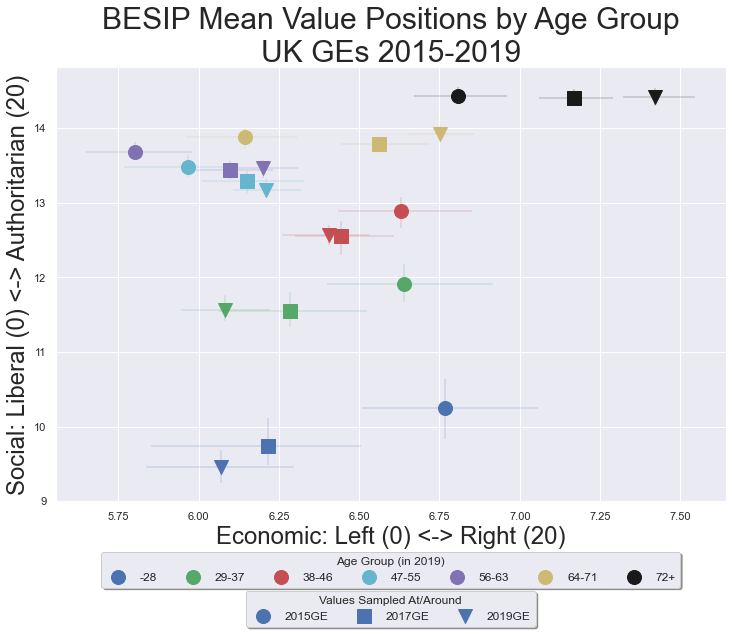

In [574]:
# %%time
# asymmetric_error = [lower_error, upper_error]

import matplotlib.patches as mpatches
legend_handles_1 = []
legend_handles_2 = []

split_var = ["equalisedAgeGroup_at_W19","wave"]
lr_var = "lr_scale"
al_var = "al_scale"
size = 100
marker_size = 14
outlr,outal = get_btstrap_vals(df,lr_var,al_var,split_var,size=size)

# if len(split_var)>1:

#     outlr.index = outlr.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)
#     outal.index = outal.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)

plt.figure(figsize=(12,8));

spl_var_1_range = outlr.index.get_level_values(split_var[0]).unique()
col_list = ['b','g','r','c','m','y','k']
cat_2_col = dict(zip(spl_var_1_range,col_list[0:len(spl_var_1_range)]))

if len(split_var)==2:
    
    spl_var_2_range = outlr.index.get_level_values(split_var[1]).unique()
    marker_list= ["o","s","v","^","P","*"]
    cat_2_marker = dict(zip(spl_var_2_range,marker_list[0:len(spl_var_2_range)]))
    cat_2_marker
    

    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():
        for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():

            plt.errorbar([outlr.loc[(spl_var1,spl_var2),"mean"]],
                     [outal.loc[(spl_var1,spl_var2),"mean"]],
                     xerr = outlr.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     yerr = outal.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     fmt='none',alpha=.2,
                     ecolor=cat_2_col[spl_var1],color=cat_2_col[spl_var1])
            plt.plot(outlr.loc[(spl_var1,spl_var2),"mean"],
                      outal.loc[(spl_var1,spl_var2),"mean"],
                      marker=cat_2_marker[spl_var2],alpha=1,
                      color=cat_2_col[spl_var1], ms=marker_size)
#             for line in range(0,outlr.shape[0]):
#                 plt.text(outlr.loc[(spl_var1,spl_var2),"mean"]+.015,
#                       outal.loc[(spl_var1,spl_var2),"mean"]+.025,
#                       spl_var2, horizontalalignment='left',
#                       size='small', )#, weight='semibold')#color='black', 
        
    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():        
#         patch = mpatches.Patch(color=cat_2_col[spl_var1], label=spl_var1)
#         [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
#             label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
        
        patch = plt.plot([],[], marker=cat_2_marker[list(cat_2_marker.keys())[0]],
                         ms=marker_size, ls="",
                         mec=None, color=cat_2_col[spl_var1],label=spl_var1)[0]
        legend_handles_1.append(patch)        
    for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():    
#         patch = mpatches.Patch(marker=cat_2_marker[spl_var2], label=spl_var2)
        patch = plt.plot([],[], marker=cat_2_marker[spl_var2], ms=marker_size, ls="",
                         mec=None, color=cat_2_col[list(cat_2_col.keys())[0]],label=spl_var2)[0]
        legend_handles_2.append(patch) 
        
# plt.errorbar(outlr["mean"], outal["mean"], xerr=np.vstack(outlr["error"].values).T, yerr = np.vstack(outal["error"].values).T,
#              fmt='x',alpha=.2)
# for line in range(0,outlr.shape[0]):
#      plt.text(outlr["mean"][line]+.01, outal["mean"][line]+.02, outlr.index[line], horizontalalignment='left',
#               size='small', color='black')#, weight='semibold')
        
        
# plt.xlim(0,10);
# plt.ylim(10,20);
plt.xlabel("Economic: Left (0) <-> Right (20)",fontsize=24);
plt.ylabel("Social: Liberal (0) <-> Authoritarian (20)",fontsize=24);
plt.title("BESIP Mean Value Positions by Age Group\nUK GEs 2015-2019",fontsize=30)
# plt.legend();

leg1 = plt.legend(handles=legend_handles_1,loc="lower center",
          bbox_to_anchor=(0.5, -.21), ncol=len(spl_var_1_range),
          fancybox=True,shadow=True,title="Age Group (in 2019)",
          fontsize=12)
plt.legend(handles=legend_handles_2,loc="lower center",
          bbox_to_anchor=(0.5, -0.3), ncol=len(spl_var_2_range),
          fancybox=True,shadow=True,title="Values Sampled At/Around",
          fontsize=12)
plt.gca().add_artist(leg1)

plt.show()


In [575]:
search(BES_Panel,"wt_new")

wt_new_W10           30237
wt_new_W11           30956
wt_new_W14           31063
wt_new_W15           30842
wt_new_W16           37959
wt_new_W1_W16         2427
wt_new_W18           37825
wt_new_W6W7          21081
wt_new_W2W6          23163
wt_new_W2W6W7        17076
wt_new_W9_W13        12562
wt_new_W12           34394
wt_new_W1_W11         6473
wt_new_W1_W12         5833
wt_new_W1_W13         5301
wt_new_W6_W11         9373
wt_new_W6_W12         8398
wt_new_W6_W13         7622
wt_new_W11_W13       21520
wt_new_W13W16        14647
wt_new_W13_result    31135
wt_new_W6W16          9587
wt_new_W2W16          8388
wt_new_W17           34366
wt_new_W13W17        15744
wt_new_W6W13W19       8743
wt_new_W9W19         13604
wt_new_W13_W19        5861
wt_new_W13W19        15811
wt_new_W16W19        21840
wt_new_W17W18W19     19000
wt_new_W19_result    32177
wt_new_W9            30036
wt_new_W8            33502
wt_new_W7            30895
wt_new_W6            30073
wt_new_W13W14        20393
w

In [584]:
vars_in_waves = { "2015GE":["lr_scaleW6","al_scaleW6","wt_new_W1_W16",],
                  "2017GE":["lr_scaleW13","al_scaleW13","wt_new_W1_W16",],
                  "2018":["lr_scaleW16","al_scaleW16","wt_new_W1_W16",],
                }

#al_scaleW6,al_scaleW13,al_scaleW17
df = pd.DataFrame()

for wave_stub in vars_in_waves.keys():
    df_temp = BES_Panel[vars_in_waves[wave_stub]]
    df_temp.rename(columns=dict(zip(vars_in_waves[wave_stub],["lr_scale","al_scale","wt"])),inplace=True)
    
    df_temp[["lr_scale","al_scale"]] = df_temp[["lr_scale","al_scale"]].apply(lambda x: x.cat.codes.replace(-1,np.nan))
    df_temp["wave"]  =wave_stub
    print(df_temp.dropna(axis=0,how='any').shape)
    df = df.append(df_temp)

df["equalisedAgeGroup_at_W19"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19"]
replace_dict = dict(zip(df["equalisedAgeGroup_at_W19"].cat.categories,["-28","29-37","38-46","47-55","56-63","64-71","72+"]))
df["equalisedAgeGroup_at_W19"].replace(replace_dict,inplace=True)

# df["equalisedAgeGroup_at_W19_detailed"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19_detailed"]
# replace_dict = dict(zip(pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"].cat.categories,
#          ["-24","25-28","29-33","34-37","38-41","42-46","47-50","51-55","56-59","60-63","64-67","68-71","72-75","76+"]))
# df["equalisedAgeGroup_at_W19_detailed"].replace(replace_dict,inplace=True)

df = df.dropna()

df["lr_scale"+"_wts"] = list(zip(df["lr_scale"],df["wt"]))
df["al_scale"+"_wts"] = list(zip(df["al_scale"],df["wt"]))

(2084, 4)
(2020, 4)
(1990, 4)


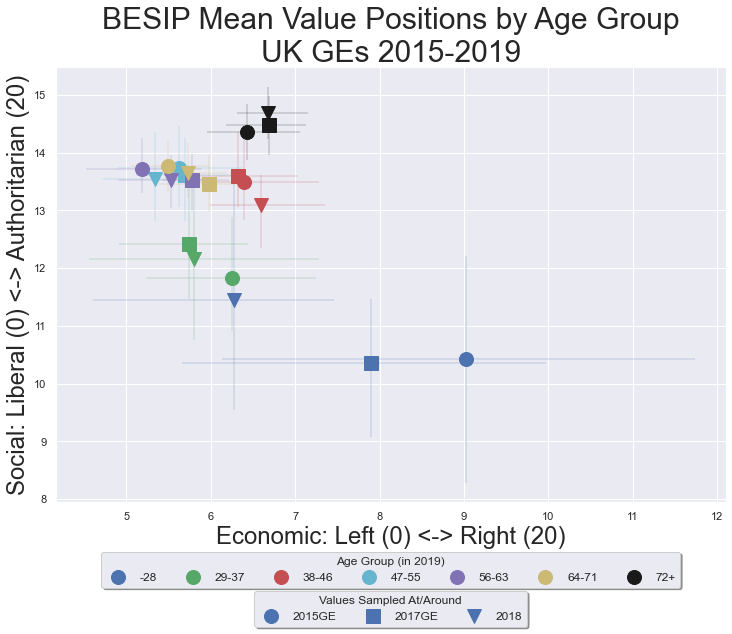

In [585]:
# %%time
# asymmetric_error = [lower_error, upper_error]

import matplotlib.patches as mpatches
legend_handles_1 = []
legend_handles_2 = []

split_var = ["equalisedAgeGroup_at_W19","wave"]
lr_var = "lr_scale"
al_var = "al_scale"
size = 100
marker_size = 14
outlr,outal = get_btstrap_vals(df,lr_var,al_var,split_var,size=size)

# if len(split_var)>1:

#     outlr.index = outlr.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)
#     outal.index = outal.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)

plt.figure(figsize=(12,8));

spl_var_1_range = outlr.index.get_level_values(split_var[0]).unique()
col_list = ['b','g','r','c','m','y','k']
cat_2_col = dict(zip(spl_var_1_range,col_list[0:len(spl_var_1_range)]))

if len(split_var)==2:
    
    spl_var_2_range = outlr.index.get_level_values(split_var[1]).unique()
    marker_list= ["o","s","v","^","P","*"]
    cat_2_marker = dict(zip(spl_var_2_range,marker_list[0:len(spl_var_2_range)]))
    cat_2_marker
    

    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():
        for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():

            plt.errorbar([outlr.loc[(spl_var1,spl_var2),"mean"]],
                     [outal.loc[(spl_var1,spl_var2),"mean"]],
                     xerr = outlr.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     yerr = outal.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     fmt='none',alpha=.2,
                     ecolor=cat_2_col[spl_var1],color=cat_2_col[spl_var1])
            plt.plot(outlr.loc[(spl_var1,spl_var2),"mean"],
                      outal.loc[(spl_var1,spl_var2),"mean"],
                      marker=cat_2_marker[spl_var2],alpha=1,
                      color=cat_2_col[spl_var1], ms=marker_size)
#             for line in range(0,outlr.shape[0]):
#                 plt.text(outlr.loc[(spl_var1,spl_var2),"mean"]+.015,
#                       outal.loc[(spl_var1,spl_var2),"mean"]+.025,
#                       spl_var2, horizontalalignment='left',
#                       size='small', )#, weight='semibold')#color='black', 
        
    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():        
#         patch = mpatches.Patch(color=cat_2_col[spl_var1], label=spl_var1)
#         [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
#             label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
        
        patch = plt.plot([],[], marker=cat_2_marker[list(cat_2_marker.keys())[0]],
                         ms=marker_size, ls="",
                         mec=None, color=cat_2_col[spl_var1],label=spl_var1)[0]
        legend_handles_1.append(patch)        
    for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():    
#         patch = mpatches.Patch(marker=cat_2_marker[spl_var2], label=spl_var2)
        patch = plt.plot([],[], marker=cat_2_marker[spl_var2], ms=marker_size, ls="",
                         mec=None, color=cat_2_col[list(cat_2_col.keys())[0]],label=spl_var2)[0]
        legend_handles_2.append(patch) 
        
# plt.errorbar(outlr["mean"], outal["mean"], xerr=np.vstack(outlr["error"].values).T, yerr = np.vstack(outal["error"].values).T,
#              fmt='x',alpha=.2)
# for line in range(0,outlr.shape[0]):
#      plt.text(outlr["mean"][line]+.01, outal["mean"][line]+.02, outlr.index[line], horizontalalignment='left',
#               size='small', color='black')#, weight='semibold')
        
        
# plt.xlim(0,10);
# plt.ylim(10,20);
plt.xlabel("Economic: Left (0) <-> Right (20)",fontsize=24);
plt.ylabel("Social: Liberal (0) <-> Authoritarian (20)",fontsize=24);
plt.title("BESIP Mean Value Positions by Age Group\nUK GEs 2015-2019",fontsize=30)
# plt.legend();

leg1 = plt.legend(handles=legend_handles_1,loc="lower center",
          bbox_to_anchor=(0.5, -.21), ncol=len(spl_var_1_range),
          fancybox=True,shadow=True,title="Age Group (in 2019)",
          fontsize=12)
plt.legend(handles=legend_handles_2,loc="lower center",
          bbox_to_anchor=(0.5, -0.3), ncol=len(spl_var_2_range),
          fancybox=True,shadow=True,title="Values Sampled At/Around",
          fontsize=12)
plt.gca().add_artist(leg1)

plt.show()


In [ ]:
# Bah - boring!

In [604]:
vars_in_waves = { "2015GE":["lr_scaleW6","al_scaleW6","wt_new_W6",],
                  "2017GE":["lr_scaleW13","al_scaleW13","wt_new_W13_result",],
                  "2019GE":["lr_scaleW17","al_scaleW17","wt_new_W17",],
                }

df = pd.DataFrame()

for wave_stub in vars_in_waves.keys():
    df_temp = BES_Panel[vars_in_waves[wave_stub]]
    df_temp.rename(columns=dict(zip(vars_in_waves[wave_stub],["lr_scale","al_scale","wt"])),inplace=True)
    
    df_temp[["lr_scale","al_scale"]] = df_temp[["lr_scale","al_scale"]].apply(lambda x: x.cat.codes.replace(-1,np.nan))
    df_temp["wave"]  =wave_stub
    print(df_temp.dropna(axis=0,how='any').shape)
    df = df.append(df_temp)
    
pan_dataset_votes["2019GEVote_complete"].value_counts()
   

df["2019GEVote_complete"] = pan_dataset_votes.loc[df.index,"2019GEVote_complete"]
replace_dict = {"UNK":np.nan,"OTH":np.nan,"Not Present":np.nan,"TYTV(Maybe)":np.nan,"DK":np.nan,"TYTV(Def)":np.nan,
               "SNP":np.nan,"PC":np.nan} 
df["2019GEVote_complete"].replace(replace_dict,inplace=True)
df["2019GEVote_complete"] = df["2019GEVote_complete"].astype('category').cat.remove_unused_categories()

# df["equalisedAgeGroup_at_W19_detailed"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19_detailed"]
# replace_dict = dict(zip(pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"].cat.categories,
#          ["-24","25-28","29-33","34-37","38-41","42-46","47-50","51-55","56-59","60-63","64-67","68-71","72-75","76+"]))
# df["equalisedAgeGroup_at_W19_detailed"].replace(replace_dict,inplace=True)

df = df.dropna()

df["lr_scale"+"_wts"] = list(zip(df["lr_scale"],df["wt"]))
df["al_scale"+"_wts"] = list(zip(df["al_scale"],df["wt"]))

(25944, 4)
(25784, 4)
(28099, 4)


In [605]:
sns.set_theme()

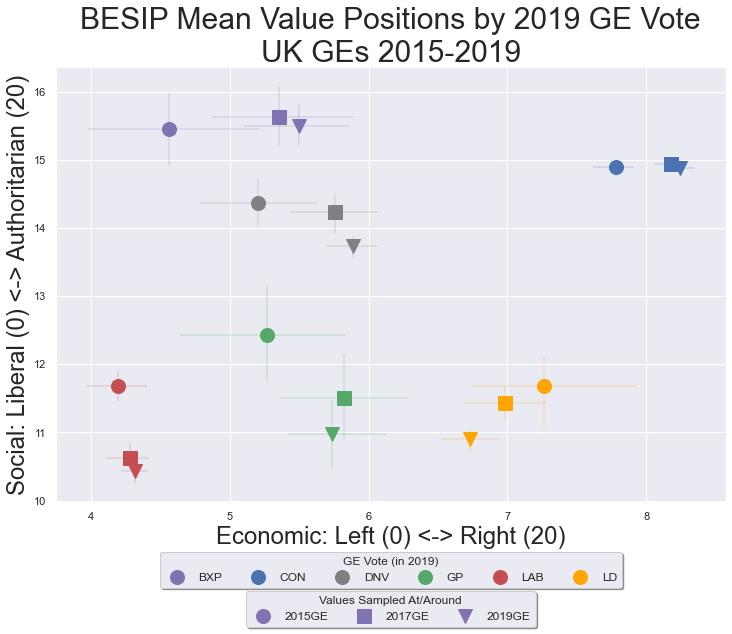

In [606]:
# %%time
# asymmetric_error = [lower_error, upper_error]

import matplotlib.patches as mpatches
legend_handles_1 = []
legend_handles_2 = []

split_var = ["2019GEVote_complete","wave"]
lr_var = "lr_scale"
al_var = "al_scale"
size = 100
marker_size = 14
outlr,outal = get_btstrap_vals(df,lr_var,al_var,split_var,size=size)

# if len(split_var)>1:

#     outlr.index = outlr.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)
#     outal.index = outal.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)

plt.figure(figsize=(12,8));

spl_var_1_range = outlr.index.get_level_values(split_var[0]).unique()
col_list = ['b','g','r','c','m','y','k','orange']
cat_2_col = dict(zip(spl_var_1_range,col_list[0:len(spl_var_1_range)]))
cat_2_col = {'BXP': 'm',
 'CON': 'b',
 'DNV': 'grey',
 'GP': 'g',
 'LAB': 'r',
 'LD': 'orange',
 'PC': 'olive','SNP':'y'}

if len(split_var)==2:
    
    spl_var_2_range = outlr.index.get_level_values(split_var[1]).unique()
    marker_list= ["o","s","v","^","P","*"]
    cat_2_marker = dict(zip(spl_var_2_range,marker_list[0:len(spl_var_2_range)]))
    cat_2_marker
    

    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():
        for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():

            plt.errorbar([outlr.loc[(spl_var1,spl_var2),"mean"]],
                     [outal.loc[(spl_var1,spl_var2),"mean"]],
                     xerr = outlr.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     yerr = outal.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     fmt='none',alpha=.2,
                     ecolor=cat_2_col[spl_var1],color=cat_2_col[spl_var1])
            plt.plot(outlr.loc[(spl_var1,spl_var2),"mean"],
                      outal.loc[(spl_var1,spl_var2),"mean"],
                      marker=cat_2_marker[spl_var2],alpha=1,
                      color=cat_2_col[spl_var1], ms=marker_size)
#             for line in range(0,outlr.shape[0]):
#                 plt.text(outlr.loc[(spl_var1,spl_var2),"mean"]+.015,
#                       outal.loc[(spl_var1,spl_var2),"mean"]+.025,
#                       spl_var2, horizontalalignment='left',
#                       size='small', )#, weight='semibold')#color='black', 
        
    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():        
#         patch = mpatches.Patch(color=cat_2_col[spl_var1], label=spl_var1)
#         [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
#             label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
        
        patch = plt.plot([],[], marker=cat_2_marker[list(cat_2_marker.keys())[0]],
                         ms=marker_size, ls="",
                         mec=None, color=cat_2_col[spl_var1],label=spl_var1)[0]
        legend_handles_1.append(patch)        
    for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():    
#         patch = mpatches.Patch(marker=cat_2_marker[spl_var2], label=spl_var2)
        patch = plt.plot([],[], marker=cat_2_marker[spl_var2], ms=marker_size, ls="",
                         mec=None, color=cat_2_col[list(cat_2_col.keys())[0]],label=spl_var2)[0]
        legend_handles_2.append(patch) 
        
# plt.errorbar(outlr["mean"], outal["mean"], xerr=np.vstack(outlr["error"].values).T, yerr = np.vstack(outal["error"].values).T,
#              fmt='x',alpha=.2)
# for line in range(0,outlr.shape[0]):
#      plt.text(outlr["mean"][line]+.01, outal["mean"][line]+.02, outlr.index[line], horizontalalignment='left',
#               size='small', color='black')#, weight='semibold')
        
        
# plt.xlim(0,10);
# plt.ylim(10,20);
plt.xlabel("Economic: Left (0) <-> Right (20)",fontsize=24);
plt.ylabel("Social: Liberal (0) <-> Authoritarian (20)",fontsize=24);
plt.title("BESIP Mean Value Positions by 2019 GE Vote\nUK GEs 2015-2019",fontsize=30)
# plt.legend();

leg1 = plt.legend(handles=legend_handles_1,loc="lower center",
          bbox_to_anchor=(0.5, -.21), ncol=len(spl_var_1_range),
          fancybox=True,shadow=True,title="GE Vote (in 2019)",
          fontsize=12)
plt.legend(handles=legend_handles_2,loc="lower center",
          bbox_to_anchor=(0.5, -0.3), ncol=len(spl_var_2_range),
          fancybox=True,shadow=True,title="Values Sampled At/Around",
          fontsize=12)
plt.gca().add_artist(leg1)

plt.show()


In [600]:
## Just look at Conservatives and just the people who didn't vote CON until 2019?

In [616]:
vars_in_waves = { "2015GE":["lr_scaleW6","al_scaleW6","wt_new_W6",],
                  "2017GE":["lr_scaleW13","al_scaleW13","wt_new_W13_result",],
                  "2019GE":["lr_scaleW17","al_scaleW17","wt_new_W17",],
                }

df = pd.DataFrame()

for wave_stub in vars_in_waves.keys():
    df_temp = BES_Panel[vars_in_waves[wave_stub]]
    df_temp.rename(columns=dict(zip(vars_in_waves[wave_stub],["lr_scale","al_scale","wt"])),inplace=True)
    
    df_temp[["lr_scale","al_scale"]] = df_temp[["lr_scale","al_scale"]].apply(lambda x: x.cat.codes.replace(-1,np.nan))
    df_temp["wave"]  =wave_stub
    print(df_temp.dropna(axis=0,how='any').shape)
    df = df.append(df_temp)
    
pan_dataset_votes["2019GEVote_complete"].value_counts()
   

df["2019GEVote_complete"] = pan_dataset_votes.loc[df.index,"2019GEVote_complete"]
con_2015 = pan_dataset_votes["2015GEVote_complete"]=="CON"
con_2017 = pan_dataset_votes["2017GEVote_complete"]=="CON"
replace_dict = {"UNK":np.nan,"OTH":np.nan,"Not Present":np.nan,"TYTV(Maybe)":np.nan,"DK":np.nan,"TYTV(Def)":np.nan,
               "SNP":np.nan,"PC":np.nan,
               "LAB":np.nan,"LD":np.nan,"BXP":np.nan,"DNV":np.nan,
               "GP":np.nan,"PC":np.nan,
               } 

df.loc[con_2015,"2019GEVote_complete"]=np.nan
df.loc[con_2017,"2019GEVote_complete"]=np.nan

df["2019GEVote_complete"].replace(replace_dict,inplace=True)
df["2019GEVote_complete"] = df["2019GEVote_complete"].astype('category').cat.remove_unused_categories()

# df["equalisedAgeGroup_at_W19_detailed"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19_detailed"]
# replace_dict = dict(zip(pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"].cat.categories,
#          ["-24","25-28","29-33","34-37","38-41","42-46","47-50","51-55","56-59","60-63","64-67","68-71","72-75","76+"]))
# df["equalisedAgeGroup_at_W19_detailed"].replace(replace_dict,inplace=True)

df = df.dropna()

df["lr_scale"+"_wts"] = list(zip(df["lr_scale"],df["wt"]))
df["al_scale"+"_wts"] = list(zip(df["al_scale"],df["wt"]))

(25944, 4)
(25784, 4)
(28099, 4)


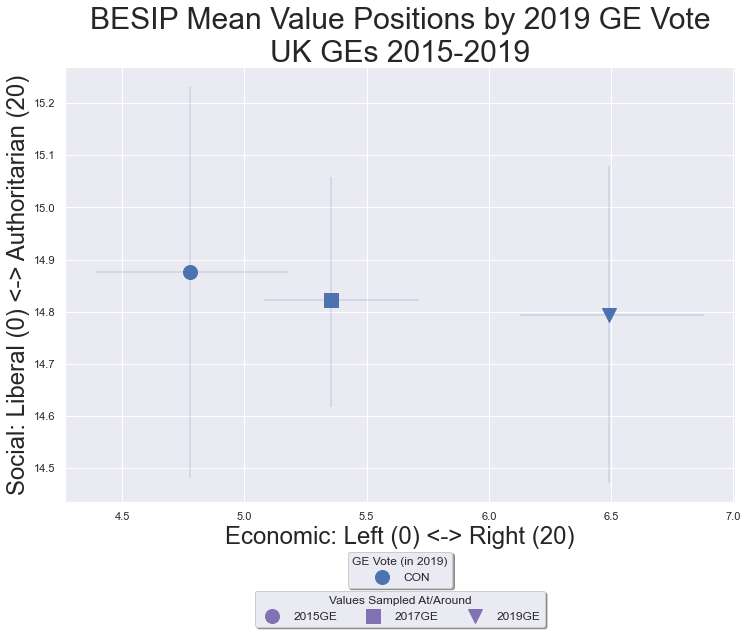

In [617]:
# %%time
# asymmetric_error = [lower_error, upper_error]

import matplotlib.patches as mpatches
legend_handles_1 = []
legend_handles_2 = []

split_var = ["2019GEVote_complete","wave"]
lr_var = "lr_scale"
al_var = "al_scale"
size = 100
marker_size = 14
outlr,outal = get_btstrap_vals(df,lr_var,al_var,split_var,size=size)

# if len(split_var)>1:

#     outlr.index = outlr.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)
#     outal.index = outal.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)

plt.figure(figsize=(12,8));

spl_var_1_range = outlr.index.get_level_values(split_var[0]).unique()
col_list = ['b','g','r','c','m','y','k','orange']
cat_2_col = dict(zip(spl_var_1_range,col_list[0:len(spl_var_1_range)]))
cat_2_col = {'BXP': 'm',
 'CON': 'b',
 'DNV': 'grey',
 'GP': 'g',
 'LAB': 'r',
 'LD': 'orange',
 'PC': 'olive','SNP':'y'}

if len(split_var)==2:
    
    spl_var_2_range = outlr.index.get_level_values(split_var[1]).unique()
    marker_list= ["o","s","v","^","P","*"]
    cat_2_marker = dict(zip(spl_var_2_range,marker_list[0:len(spl_var_2_range)]))
    cat_2_marker
    

    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():
        for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():

            plt.errorbar([outlr.loc[(spl_var1,spl_var2),"mean"]],
                     [outal.loc[(spl_var1,spl_var2),"mean"]],
                     xerr = outlr.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     yerr = outal.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     fmt='none',alpha=.2,
                     ecolor=cat_2_col[spl_var1],color=cat_2_col[spl_var1])
            plt.plot(outlr.loc[(spl_var1,spl_var2),"mean"],
                      outal.loc[(spl_var1,spl_var2),"mean"],
                      marker=cat_2_marker[spl_var2],alpha=1,
                      color=cat_2_col[spl_var1], ms=marker_size)
#             for line in range(0,outlr.shape[0]):
#                 plt.text(outlr.loc[(spl_var1,spl_var2),"mean"]+.015,
#                       outal.loc[(spl_var1,spl_var2),"mean"]+.025,
#                       spl_var2, horizontalalignment='left',
#                       size='small', )#, weight='semibold')#color='black', 
        
    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():        
#         patch = mpatches.Patch(color=cat_2_col[spl_var1], label=spl_var1)
#         [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
#             label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
        
        patch = plt.plot([],[], marker=cat_2_marker[list(cat_2_marker.keys())[0]],
                         ms=marker_size, ls="",
                         mec=None, color=cat_2_col[spl_var1],label=spl_var1)[0]
        legend_handles_1.append(patch)        
    for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():    
#         patch = mpatches.Patch(marker=cat_2_marker[spl_var2], label=spl_var2)
        patch = plt.plot([],[], marker=cat_2_marker[spl_var2], ms=marker_size, ls="",
                         mec=None, color=cat_2_col[list(cat_2_col.keys())[0]],label=spl_var2)[0]
        legend_handles_2.append(patch) 
        
# plt.errorbar(outlr["mean"], outal["mean"], xerr=np.vstack(outlr["error"].values).T, yerr = np.vstack(outal["error"].values).T,
#              fmt='x',alpha=.2)
# for line in range(0,outlr.shape[0]):
#      plt.text(outlr["mean"][line]+.01, outal["mean"][line]+.02, outlr.index[line], horizontalalignment='left',
#               size='small', color='black')#, weight='semibold')
        
        
# plt.xlim(0,10);
# plt.ylim(10,20);
plt.xlabel("Economic: Left (0) <-> Right (20)",fontsize=24);
plt.ylabel("Social: Liberal (0) <-> Authoritarian (20)",fontsize=24);
plt.title("BESIP Mean Value Positions by 2019 GE Vote\nUK GEs 2015-2019",fontsize=30)
# plt.legend();

leg1 = plt.legend(handles=legend_handles_1,loc="lower center",
          bbox_to_anchor=(0.5, -.21), ncol=len(spl_var_1_range),
          fancybox=True,shadow=True,title="GE Vote (in 2019)",
          fontsize=12)
plt.legend(handles=legend_handles_2,loc="lower center",
          bbox_to_anchor=(0.5, -0.3), ncol=len(spl_var_2_range),
          fancybox=True,shadow=True,title="Values Sampled At/Around",
          fontsize=12)
plt.gca().add_artist(leg1)

plt.show()


In [ ]:
# by request, split by housing tenure

In [629]:
vars_in_waves = { "2015GE":["lr_scaleW6","al_scaleW6","wt_new_W6",],
                  "2017GE":["lr_scaleW13","al_scaleW13","wt_new_W13_result",],
                  "2019GE":["lr_scaleW17","al_scaleW17","wt_new_W17",],
                }

df = pd.DataFrame()

for wave_stub in vars_in_waves.keys():
    df_temp = BES_Panel[vars_in_waves[wave_stub]]
    df_temp.rename(columns=dict(zip(vars_in_waves[wave_stub],["lr_scale","al_scale","wt"])),inplace=True)
    
    df_temp[["lr_scale","al_scale"]] = df_temp[["lr_scale","al_scale"]].apply(lambda x: x.cat.codes.replace(-1,np.nan))
    df_temp["wave"]  =wave_stub
    print(df_temp.dropna(axis=0,how='any').shape)
    df = df.append(df_temp)

# df["2019GEVote_complete"] = pan_dataset_votes.loc[df.index,"2019GEVote_complete"]
# con_2015 = pan_dataset_votes["2015GEVote_complete"]=="CON"
# con_2017 = pan_dataset_votes["2017GEVote_complete"]=="CON"
# replace_dict = {"UNK":np.nan,"OTH":np.nan,"Not Present":np.nan,"TYTV(Maybe)":np.nan,"DK":np.nan,"TYTV(Def)":np.nan,
#                "SNP":np.nan,"PC":np.nan,
#                "LAB":np.nan,"LD":np.nan,"BXP":np.nan,"DNV":np.nan,
#                "GP":np.nan,"PC":np.nan,
#                } 

# # df.loc[con_2015,"2019GEVote_complete"]=np.nan
# # df.loc[con_2017,"2019GEVote_complete"]=np.nan

# df["2019GEVote_complete"].replace(replace_dict,inplace=True)
# df["2019GEVote_complete"] = df["2019GEVote_complete"].astype('category').cat.remove_unused_categories()

replace_dict = {'Neither I live rent-free with my parents, family or friends':np.nan,
                  'Neither I live with my parents, family or friends but pay some rent to them':np.nan,
                  'Other':np.nan,
                  'Own (part-own) through shared ownership scheme (i.e. pay part mortgage, part rent)':np.nan}
df["p_housingW19"] = BES_Panel["p_housingW19"]
df["p_housingW19"].replace(replace_dict,inplace=True)
# df["equalisedAgeGroup_at_W19_detailed"] = pan_dataset_ages.loc[df.index,"equalisedAgeGroup_at_W19_detailed"]
# replace_dict = dict(zip(pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"].cat.categories,
#          ["-24","25-28","29-33","34-37","38-41","42-46","47-50","51-55","56-59","60-63","64-67","68-71","72-75","76+"]))
# df["equalisedAgeGroup_at_W19_detailed"].replace(replace_dict,inplace=True)

df = df.dropna()

df["lr_scale"+"_wts"] = list(zip(df["lr_scale"],df["wt"]))
df["al_scale"+"_wts"] = list(zip(df["al_scale"],df["wt"]))

(25944, 4)
(25784, 4)
(28099, 4)


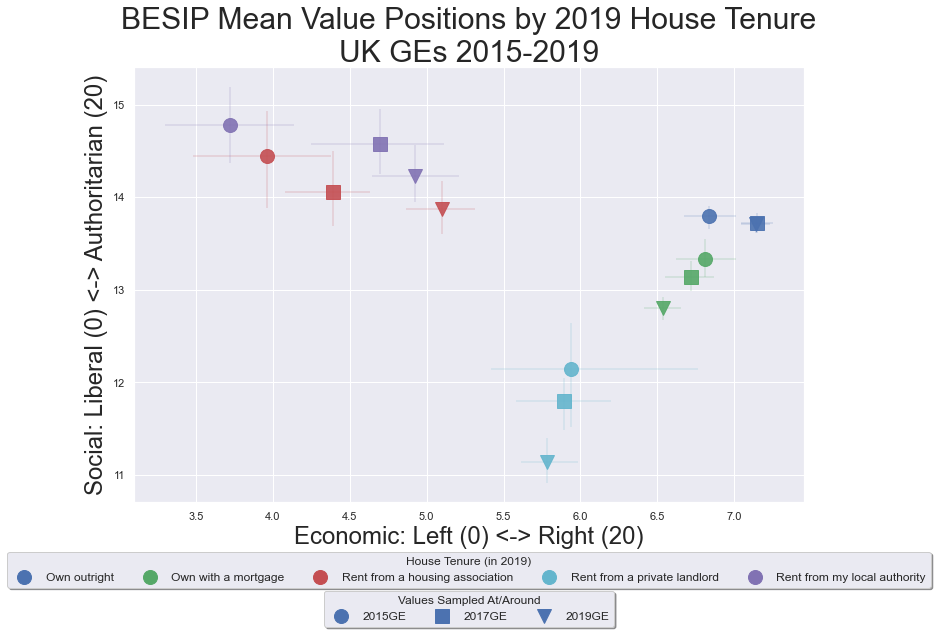

In [634]:
# %%time
# asymmetric_error = [lower_error, upper_error]

import matplotlib.patches as mpatches
legend_handles_1 = []
legend_handles_2 = []

split_var = ["p_housingW19","wave"]
lr_var = "lr_scale"
al_var = "al_scale"
size = 100
marker_size = 14
outlr,outal = get_btstrap_vals(df,lr_var,al_var,split_var,size=size)

# if len(split_var)>1:

#     outlr.index = outlr.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)
#     outal.index = outal.reset_index()[split_var].apply(lambda x: "|".join(map(str,x)),axis=1)

plt.figure(figsize=(12,8));

spl_var_1_range = outlr.index.get_level_values(split_var[0]).unique()
col_list = ['b','g','r','c','m','y','k','orange','grey',]
cat_2_col = dict(zip(spl_var_1_range,col_list[0:len(spl_var_1_range)]))
# cat_2_col = {'BXP': 'm',
#  'CON': 'b',
#  'DNV': 'grey',
#  'GP': 'g',
#  'LAB': 'r',
#  'LD': 'orange',
#  'PC': 'olive','SNP':'y'}

if len(split_var)==2:
    
    spl_var_2_range = outlr.index.get_level_values(split_var[1]).unique()
    marker_list= ["o","s","v","^","P","*"]
    cat_2_marker = dict(zip(spl_var_2_range,marker_list[0:len(spl_var_2_range)]))
    cat_2_marker
    

    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():
        for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():

            plt.errorbar([outlr.loc[(spl_var1,spl_var2),"mean"]],
                     [outal.loc[(spl_var1,spl_var2),"mean"]],
                     xerr = outlr.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     yerr = outal.loc[(spl_var1,spl_var2),"error"].reshape(2,1),
                     fmt='none',alpha=.2,
                     ecolor=cat_2_col[spl_var1],color=cat_2_col[spl_var1])
            plt.plot(outlr.loc[(spl_var1,spl_var2),"mean"],
                      outal.loc[(spl_var1,spl_var2),"mean"],
                      marker=cat_2_marker[spl_var2],alpha=.9,
                      color=cat_2_col[spl_var1], ms=marker_size)
#             for line in range(0,outlr.shape[0]):
#                 plt.text(outlr.loc[(spl_var1,spl_var2),"mean"]+.015,
#                       outal.loc[(spl_var1,spl_var2),"mean"]+.025,
#                       spl_var2, horizontalalignment='left',
#                       size='small', )#, weight='semibold')#color='black', 
        
    for spl_var1 in outlr.index.get_level_values(split_var[0]).unique():        
#         patch = mpatches.Patch(color=cat_2_col[spl_var1], label=spl_var1)
#         [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i], 
#             label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
        
        patch = plt.plot([],[], marker=cat_2_marker[list(cat_2_marker.keys())[0]],
                         ms=marker_size, ls="",
                         mec=None, color=cat_2_col[spl_var1],label=spl_var1)[0]
        legend_handles_1.append(patch)        
    for spl_var2 in outlr.index.get_level_values(split_var[1]).unique():    
#         patch = mpatches.Patch(marker=cat_2_marker[spl_var2], label=spl_var2)
        patch = plt.plot([],[], marker=cat_2_marker[spl_var2], ms=marker_size, ls="",
                         mec=None, color=cat_2_col[list(cat_2_col.keys())[0]],label=spl_var2)[0]
        legend_handles_2.append(patch) 
        
# plt.errorbar(outlr["mean"], outal["mean"], xerr=np.vstack(outlr["error"].values).T, yerr = np.vstack(outal["error"].values).T,
#              fmt='x',alpha=.2)
# for line in range(0,outlr.shape[0]):
#      plt.text(outlr["mean"][line]+.01, outal["mean"][line]+.02, outlr.index[line], horizontalalignment='left',
#               size='small', color='black')#, weight='semibold')
        
        
# plt.xlim(0,10);
# plt.ylim(10,20);
plt.xlabel("Economic: Left (0) <-> Right (20)",fontsize=24);
plt.ylabel("Social: Liberal (0) <-> Authoritarian (20)",fontsize=24);
plt.title("BESIP Mean Value Positions by 2019 House Tenure\nUK GEs 2015-2019",fontsize=30)
# plt.legend();

leg1 = plt.legend(handles=legend_handles_1,loc="lower center",
          bbox_to_anchor=(0.5, -.21),ncol=len(spl_var_1_range),
          fancybox=True,shadow=True,title="House Tenure (in 2019)",
          fontsize=12)
plt.legend(handles=legend_handles_2,loc="lower center",
          bbox_to_anchor=(0.5, -0.3), ncol=len(spl_var_2_range),
          fancybox=True,shadow=True,title="Values Sampled At/Around",
          fontsize=12)
plt.gca().add_artist(leg1)

plt.show()


In [619]:
search(BES_Panel,"housing")

p_housingW1     30289
p_housingW2     30226
p_housingW3     28110
p_housingW4     31265
p_housingW5     30765
p_housingW6     30092
p_housingW7     30204
p_housingW8     33355
p_housingW9     29953
p_housingW10    30236
p_housingW11    30262
p_housingW12    33599
p_housingW13    30759
p_housingW14    30446
p_housingW15    29965
p_housingW16    36171
p_housingW17    33616
p_housingW18    37529
p_housingW19    32008
dtype: int64

In [621]:
BES_Panel["p_housingW19"].cat.categories

Index(['Own outright', 'Own with a mortgage',
       'Own (part-own) through shared ownership scheme (i.e. pay part mortgage, part rent)',
       'Rent from a private landlord', 'Rent from my local authority',
       'Rent from a housing association',
       'Neither I live with my parents, family or friends but pay some rent to them',
       'Neither I live rent-free with my parents, family or friends', 'Other'],
      dtype='object')

In [628]:
BES_Panel["p_housingW19"].value_counts().index

CategoricalIndex(['Own outright', 'Own with a mortgage',
                  'Rent from a private landlord',
                  'Rent from a housing association',
                  'Rent from my local authority',
                  'Neither I live rent-free with my parents, family or friends',
                  'Neither I live with my parents, family or friends but pay some rent to them',
                  'Other',
                  'Own (part-own) through shared ownership scheme (i.e. pay part mortgage, part rent)'],
                 categories=['Own outright', 'Own with a mortgage', 'Own (part-own) through shared ownership scheme (i.e. pay part mortgage, part rent)', 'Rent from a private landlord', 'Rent from my local authority', 'Rent from a housing association', 'Neither I live with my parents, family or friends but pay some rent to them', 'Neither I live rent-free with my parents, family or friends', ...], ordered=True, dtype='category')